In [1]:
from solvers import EvolutionaryAlgorithm, PathRepresentation

Cost: $d + (d \cdot \alpha \cdot w)^\beta$

In [9]:
from solvers import SelectionMethods
from functools import partial

problem_rep = PathRepresentation(100, density=1.0, alpha=1, beta=2, seed=42)

In [10]:
algorithm = EvolutionaryAlgorithm(
    problem_rep=problem_rep,
    population_size=150,
    offspring_size=100,
    selection_method=partial(SelectionMethods.tournament_selection, tournament_size=10)
)

Initializing population:   0%|          | 0/150 [00:00<?, ?it/s]

Initializing population: 100%|██████████| 150/150 [00:04<00:00, 33.30it/s]


In [12]:
last_pop, history = algorithm.solve(num_generations=10, mutation_rate=0.3)

Evolving:   0%|          | 0/10 [00:00<?, ?it/s]

Evolving: 100%|██████████| 10/10 [00:28<00:00,  2.84s/it]


Best solution: 111243.26529378799
baseline 5404978.08899582


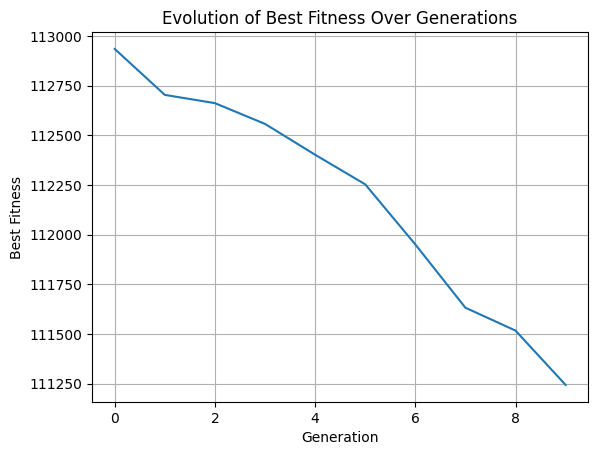

In [13]:
print("Best solution:", last_pop[0].fitness)
print("baseline", problem_rep.baseline())
algorithm.plot(history)

In [14]:
algorithm.validate_solution(last_pop[0].genotype)

Total gold — expected: 46632.07, actual: 46632.07, match: True


True

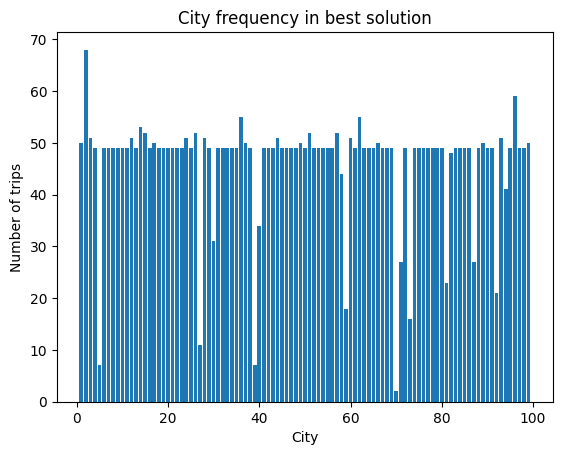

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_city_frequency(sol, cities, title):
    freq = {c: 0 for c in cities}
    for trip in sol:
        for c, g in trip:
            freq[c] += 1
    plt.bar(freq.keys(), freq.values())
    plt.xlabel("City")
    plt.ylabel("Number of trips")
    plt.title(title)

plot_city_frequency(last_pop[0].genotype, problem_rep.cities, "City frequency in best solution")